## Horas de estudio VS aprobados [Regresión logística]

In [56]:
# El siguiente ejemplo muestra la cantidad de horas que estudió cada alumno contra, si aprobaron o no el examen

# Importamos librerías
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression, LinearRegression

In [57]:
# ejemplos de entrenamiento
# capturado = 1
# escapó = 0

nivel_entrenador = np.array([0, 5, 15, 30, 50, 60, 85, 92, 98, 99]).reshape(-1, 1)
resultado        = np.array([0, 0,  0,  0,  1,  0,  1,  1,  1,  1])

# Inicializar (Instanciar) y entrenar el modelo de regresión logística
model = LogisticRegression(solver = 'lbfgs') # "limited memory Broyden-Fletcher-Goldfarb-Shanno"
model.fit(nivel_entrenador, resultado)

model_linear = LinearRegression().fit(nivel_entrenador, resultado)
# otro solvers son:
# 'lblinear' (Regularización l1)
# 'sag' (sigmoidal augmented gradient)

# Parámetros b0 y b1 para la ecuación de la regresión.
print("Logistic")
print(model.coef_)
print(model.intercept_)

# Parámetros b0 y b1 para la ecuación de la regresión.
print("Linear")
print(model_linear.coef_)
print(model_linear.intercept_)


Logistic
[[0.10121469]]
[-5.57887296]
Linear
[0.01135345]
-0.10627404471956248


## Gráfica

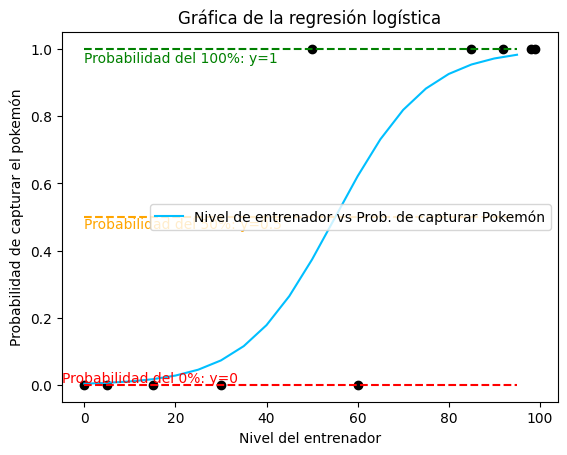

In [58]:
# Ploteamos el modelo de regresión logística para visualizarlo
plt.scatter(nivel_entrenador, resultado, color='black')

# Creamos una lista de 10 elementos para predecir la probabilidad
# de o, 0, 1, 2, 3, etc...
niveles_e = np.arange(0, 100, 5).reshape(-1, 1)

# Obtenemos la probabilidad de aprobar el examen para cada uno de los 100 elementos
plt.plot(niveles_e, model.predict_proba(niveles_e)[:, 1], color='deepskyblue', label='Nivel de entrenador vs Prob. de capturar Pokemón')

# Hacemos ploteos adicionales con los límites de probabilidad
plt.plot(niveles_e, np.ones(len(niveles_e)), color='green', linestyle='dashed')
plt.text(0, 0.95, 'Probabilidad del 100%: y=1', ha='left', va='bottom', color='green')

plt.plot(niveles_e, np.zeros(len(niveles_e)), color='red', linestyle='dashed')
plt.text(-5, 0, 'Probabilidad del 0%: y=0', ha='left', va='bottom', color='red')

plt.plot(niveles_e, np.ones(len(niveles_e))*0.5, color='orange', linestyle='dashed')
plt.text(0, 0.5, 'Probabilidad del 50%: y=0.5', ha='left', va='top', color='orange')

# Títulos de la gráfica
plt.xlabel('Nivel del entrenador')
plt.ylabel('Probabilidad de capturar el pokemón')
plt.title('Gráfica de la regresión logística')
plt.legend(loc='center right')
plt.show()

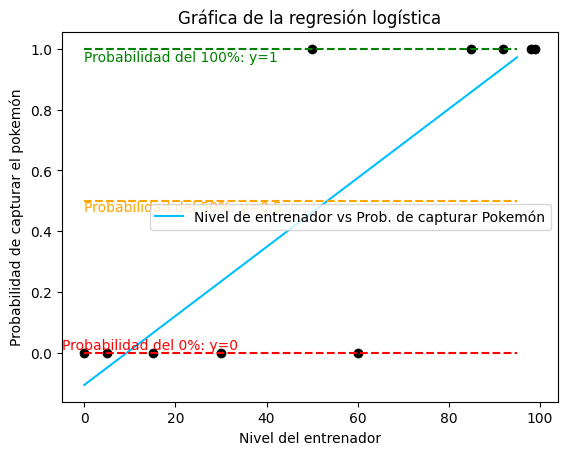

In [59]:
# Ploteamos el modelo de regresión logística para visualizarlo
plt.scatter(nivel_entrenador, resultado, color='black')

# Creamos una lista de 10 elementos para predecir la probabilidad
# de o, 0, 1, 2, 3, etc...
niveles_e = np.arange(0, 100, 5).reshape(-1, 1)

# Obtenemos la probabilidad de aprobar el examen para cada uno de los 100 elementos
plt.plot(niveles_e, model_linear.predict(niveles_e), color='deepskyblue', label='Nivel de entrenador vs Prob. de capturar Pokemón')

# Hacemos ploteos adicionales con los límites de probabilidad
plt.plot(niveles_e, np.ones(len(niveles_e)), color='green', linestyle='dashed')
plt.text(0, 0.95, 'Probabilidad del 100%: y=1', ha='left', va='bottom', color='green')

plt.plot(niveles_e, np.zeros(len(niveles_e)), color='red', linestyle='dashed')
plt.text(-5, 0, 'Probabilidad del 0%: y=0', ha='left', va='bottom', color='red')

plt.plot(niveles_e, np.ones(len(niveles_e))*0.5, color='orange', linestyle='dashed')
plt.text(0, 0.5, 'Probabilidad del 50%: y=0.5', ha='left', va='top', color='orange')

# Títulos de la gráfica
plt.xlabel('Nivel del entrenador')
plt.ylabel('Probabilidad de capturar el pokemón')
plt.title('Gráfica de la regresión logística')
plt.legend(loc='center right')
plt.show()

In [60]:
# R. Logística
# busqué como obtener el valor de entrada de f(x) fácilmente en línea, en vez de despejar la función a mano
nivel_50_log = np.interp(0.5, model.predict_proba(niveles_e)[:, 1], niveles_e[:,0])
nivel_50_log = int(np.round(nivel_50_log))

print("R. Logística\nNivel necesario para tener 50% de probabilidad",nivel_50_log, sep="\n")

niveles_e = np.array([10, 30, 70, 90]).reshape(-1, 1)
for h in niveles_e:
    proba = model.predict_proba(np.array(h).reshape(1, -1))[0][1]
    print("Lv.", h, "--> " + str(round(proba*100, 2)) + "% probailidad de capturar")

# R. Lineal
nivel_50_lin = np.round((0.5 - model_linear.intercept_) / model_linear.coef_[0])

print("R. Lineal\nNivel necesario para tener 50% de probabilidad",nivel_50_lin, sep="\n")
niveles_e = np.array([10, 30, 70, 90]).reshape(-1, 1)
for h in niveles_e:
    proba = model_linear.predict(np.array(h).reshape(1, -1))[0]
    print("Lv.", h, "--> " + str(round(proba*100, 2)) + "% probailidad de capturar")



R. Logística
Nivel necesario para tener 50% de probabilidad
55
Lv. [10] --> 1.03% probailidad de capturar
Lv. [30] --> 7.29% probailidad de capturar
Lv. [70] --> 81.85% probailidad de capturar
Lv. [90] --> 97.15% probailidad de capturar
R. Lineal
Nivel necesario para tener 50% de probabilidad
53.0
Lv. [10] --> 0.73% probailidad de capturar
Lv. [30] --> 23.43% probailidad de capturar
Lv. [70] --> 68.85% probailidad de capturar
Lv. [90] --> 91.55% probailidad de capturar


In [65]:
# ejemplos de entrenamiento
# capturado = 1
# escapó = 0

nivel_entrenador = np.array([0, 5, 15, 30, 50, 60, 85, 92, 98, 99]).reshape(-1, 1)
resultado        = np.array([0, 0,  0,  0,  0,  0,  0,  0,  1,  1])

# Inicializar (Instanciar) y entrenar el modelo de regresión logística
model = LogisticRegression(solver = 'lbfgs') # "limited memory Broyden-Fletcher-Goldfarb-Shanno"
model.fit(nivel_entrenador, resultado)

# Parámetros b0 y b1 para la ecuación de la regresión.
print("Logistic")
print(model.coef_)
print(model.intercept_)

# son mas altos, pues el punto en donde empieza a subir la probabilidad
# de capturar el pokemón es mucho más tarde, además de que es súbita,
# ni los entrenadores con 92 u 85 capturaron el pokemón

for prob in [.5, .9]:
    # busqué como obtener el valor de entrada de f(x) fácilmente en línea, en vez de despejar la función a mano
    nivel = int(np.round(np.interp(prob, model.predict_proba(niveles_e)[:, 1], niveles_e[:,0])))
    print(f"R. Logística\nNivel necesario para tener {prob*100}% de probabilidad",nivel, sep="\n")


Logistic
[[0.74781656]]
[-70.82380735]
R. Logística
Nivel necesario para tener 50.0% de probabilidad
95
R. Logística
Nivel necesario para tener 90.0% de probabilidad
98


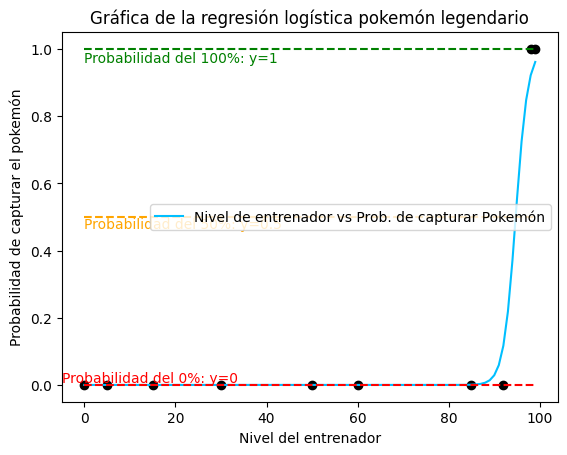

In [64]:
# Ploteamos el modelo de regresión logística para visualizarlo
plt.scatter(nivel_entrenador, resultado, color='black')

# Creamos una lista de 10 elementos para predecir la probabilidad
# de o, 0, 1, 2, 3, etc...
niveles_e = np.arange(0, 100, 1).reshape(-1, 1)

# Obtenemos la probabilidad de aprobar el examen para cada uno de los 100 elementos
plt.plot(niveles_e, model.predict_proba(niveles_e)[:, 1], color='deepskyblue', label='Nivel de entrenador vs Prob. de capturar Pokemón')

# Hacemos ploteos adicionales con los límites de probabilidad
plt.plot(niveles_e, np.ones(len(niveles_e)), color='green', linestyle='dashed')
plt.text(0, 0.95, 'Probabilidad del 100%: y=1', ha='left', va='bottom', color='green')

plt.plot(niveles_e, np.zeros(len(niveles_e)), color='red', linestyle='dashed')
plt.text(-5, 0, 'Probabilidad del 0%: y=0', ha='left', va='bottom', color='red')

plt.plot(niveles_e, np.ones(len(niveles_e))*0.5, color='orange', linestyle='dashed')
plt.text(0, 0.5, 'Probabilidad del 50%: y=0.5', ha='left', va='top', color='orange')

# Títulos de la gráfica
plt.xlabel('Nivel del entrenador')
plt.ylabel('Probabilidad de capturar el pokemón')
plt.title('Gráfica de la regresión logística pokemón legendario')
plt.legend(loc='center right')
plt.show()